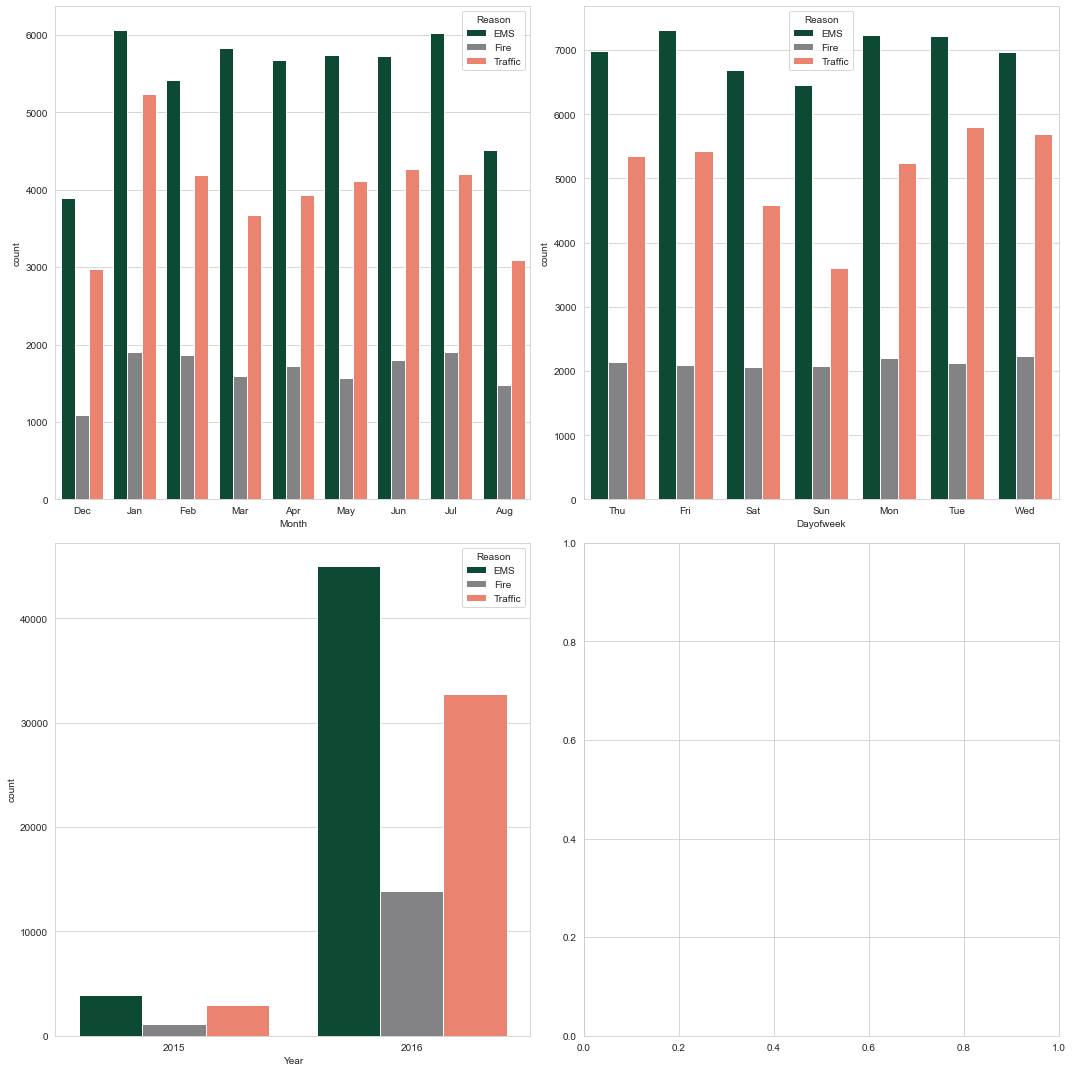

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') #Can choose from 'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'


df = pd.read_csv(r'C:\Users\Amish\OneDrive - Bendelta\Jupyter\911.csv')

df['Reason'] = df['title'].apply(lambda x: x.split(sep = ':', maxsplit = -1)) #Making a new column called 'Reason' and splitting "title" by :
df['Reason'] = df['Reason'].apply(lambda x: x[0]) #Making the column equal to the first value
df['timeStamp'] = pd.to_datetime(df['timeStamp']) #Making the column into time format
df['Year'] = df['timeStamp'].apply(lambda x: x.year) #Makeing a new column for the year
df['Month'] = df['timeStamp'].apply(lambda x: x.month) #Makeing a new column for the month
df['Day'] = df['timeStamp'].apply(lambda x: x.day) #Makeing a new column for the day
df['Dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek) #Makeing a new column for day of the week
df = df.drop(['e'], axis=1) #Dropping column 'e' as it is useless

day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df['Dayofweek'] = df['Dayofweek'].map(day) #Mapping numbers to days
df['Month'] = df['Month'].map(month) #Mapping numbers to months

df['Issue'] = df['title'].apply(lambda x: x.split(sep = ': ', maxsplit = 1)) #Making a new column called 'Issue' and splitting "title" by ': ''
df['Issue'] = df['Issue'].apply(lambda x: x[-1]) #Making the column equal to the last value


bendeltacolors = ["#035336", "#828386", "#fe765d"] #Creating an array with custom colours we want to use
sns.set_palette(sns.color_palette(bendeltacolors)) #Setting your custom colour palette

fig, axes = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x='Month',data=df,hue='Reason', ax=axes[0,0])
sns.countplot(x='Dayofweek',data=df,hue='Reason', ax=axes[0,1])
sns.countplot(x='Year',data=df,hue='Reason', ax=axes[1,0])
plt.tight_layout()
plt.show()

